In [2]:
import glob
import pandas as pd
import av
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import scipy
import datetime
import calendar
from tqdm import tqdm

# dataset_dir = "/home/arthur/felles/Research/Users/Alexander/Still Standing/1-raw"
dataset_dir = "/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw"

In [3]:
pd.read_excel("../stillstanding_video_claps_annika.ods")

,filename,clap_start,clap_end
0,stillstanding_1_spherical.mp4,00:01:33,00:11:04
1,stillstanding_2_spherical.mp4,00:00:59,00:10:24
2,stillstanding_3_spherical.mp4,00:01:11,00:10:37
3,stillstanding_4_spherical.mp4,00:02:07,00:11:37
4,stillstanding_5_spherical.mp4,00:01:11,00:10:45
...,...,...,...
350,stillstanding_361_spherical.mp4,00:01:29,00:11:00
351,stillstanding_362_spherical.mp4,00:01:24,00:11:05
352,stillstanding_363_spherical.mp4,00:02:20,00:11:45
353,stillstanding_364_spherical.mp4,00:01:17,00:10:49


# Loudness

In [4]:
phone_data_list = sorted(glob.glob(f"{dataset_dir}/**/**/*processed*/*phone.csv"))
print(len(phone_data_list))
phone_data_list

356


['/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-01/2-processed/stillstanding_1_phone.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-02/2-processed/stillstanding_2_phone.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-03/2-processed/stillstanding_3_phone.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-04/2-processed/stillstanding_4_phone.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-05/2-processed/stillstanding_5_phone.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-06/2-processed/stillstanding_6_phone.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-07/2-processed/stillstanding_7_phone.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Rese

In [5]:
phone_data_list = sorted(glob.glob(f"{dataset_dir}/**/**/*processed*/*watch.csv")+glob.glob(f"{dataset_dir}/**/**/*processed*/*polar.csv"))
print(len(phone_data_list))
phone_data_list

357


['/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-01/2-processed/stillstanding_1_watch.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-02/2-processed/stillstanding_2_watch.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-03/2-processed/stillstanding_3_watch.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-04/2-processed/stillstanding_4_watch.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-05/2-processed/stillstanding_5_watch.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-06/2-processed/stillstanding_6_watch.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-07/2-processed/stillstanding_7_watch.csv',
 '/fp/homes01/u01/ec-jinyueg/felles3/Rese

In [6]:
phone_data_list = sorted(glob.glob(f"{dataset_dir}/**/**/*processed*/*spherical_trim.mp4"))
print(len(phone_data_list))
phone_data_list

355


['/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-01/2-processed/stillstanding_1_spherical_trim.mp4',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-02/2-processed/stillstanding_2_spherical_trim.mp4',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-03/2-processed/stillstanding_3_spherical_trim.mp4',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-04/2-processed/stillstanding_4_spherical_trim.mp4',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-05/2-processed/stillstanding_5_spherical_trim.mp4',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-06/2-processed/stillstanding_6_spherical_trim.mp4',
 '/fp/homes01/u01/ec-jinyueg/felles3/Research/Users/Alexander/Still Standing/1-raw/01/2023-01-07/2-processed/stillstanding_7

In [8]:
data = pd.read_csv(phone_data_list[1], encoding='ascii')
data

UnicodeDecodeError: 'ascii' codec can't decode byte 0xcb in position 42: ordinal not in range(128)

In [10]:
data["time_column"][0].split(" ")[0].split("-")

NameError: name 'data' is not defined

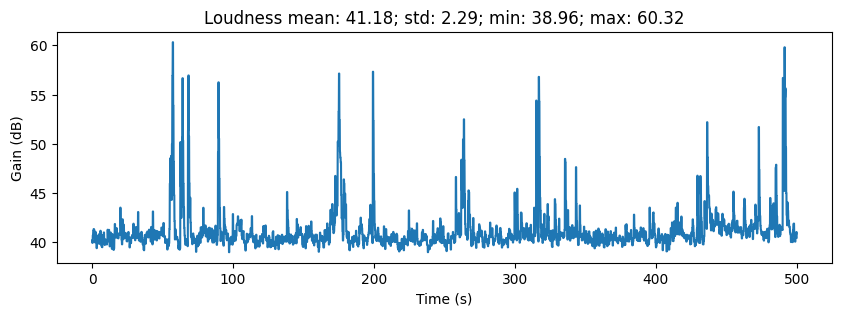

In [5]:
plt.figure(figsize=(10, 3))
plt.plot(data["time"], data["Gain"])
plt.title(f"Loudness mean: {data['Gain'].mean():.2f}; std: {data['Gain'].std():.2f}; min: {data['Gain'].min():.2f}; max: {data['Gain'].max():.2f}")
plt.xlabel("Time (s)")
plt.ylabel("Gain (dB)")

des = data["Gain"].describe()

In [47]:
# figure = plt.figure(figsize=(10, 3))
# plt.title("Loudness")
# plt.xlabel("Time (s)")
# plt.ylabel("Gain (dB)")

data = []
stats = []
for phone_data_file in tqdm(phone_data_list):
    data_i = pd.read_csv(phone_data_file)
    # plt.plot(data["time"], data["Gain"], alpha=0.5)
    data.append(data_i)
    des = data_i["Gain"].describe()
    month, day = phone_data_file.split("2023-")[1].split("/")[0].split(" ")[0].split("-")
    des["month"] = month
    des["day"] = day
    stats.append(des)

data = pd.concat(data, ignore_index=True)
data.dropna(subset=['Gain', 'time'], inplace=True)
# # Calculate the mean and standard deviation
# mean_hr = data['Gain'].mean()
# std_hr = data['Gain'].std()
plt.figure(figsize=(12, 4))
# # Plot the line chart
# sns.lineplot(x='time', y='Gain', data=data)

# # Plot the mean line
# plt.axhline(mean_hr, color='red', linestyle='-', label='Mean HR')

# # Plot the upper and lower bounds for 1 standard deviation
# plt.axhline(mean_hr + std_hr, color='green', linestyle='--', label='+1 SD')
# plt.axhline(mean_hr - std_hr, color='green', linestyle='--', label='-1 SD')

# # Set plot title and labels
# plt.title('Mean and Standard Deviation')
# plt.xlabel('time (s)')
# plt.ylabel('loudness (dB)')

# # Add legend
# plt.legend()

# # Display the plot
# plt.show()


stats = pd.DataFrame(stats)
stats

100%|██████████| 362/362 [01:31<00:00,  3.94it/s]


Text(0, 0.5, 'Gain (dB)')

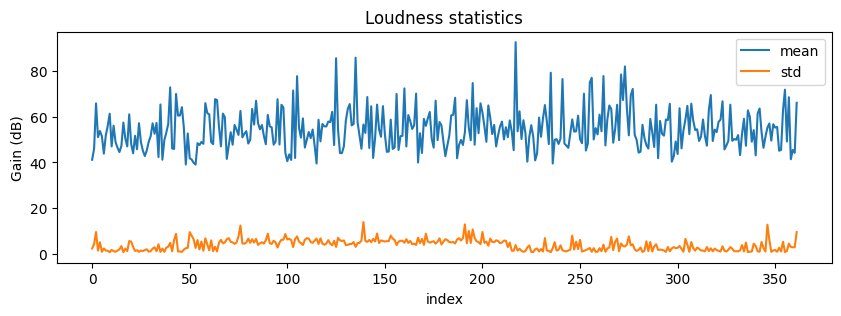

In [32]:
plt.figure(figsize=(10, 3))
plt.plot(stats["mean"].to_numpy(), label="mean")
plt.plot(stats["std"].to_numpy(), label="std")
plt.legend()
plt.title("Loudness statistics")
plt.xlabel("index")
plt.ylabel("Gain (dB)")

[Text(0, 0.5, 'Loudness std (dB)')]

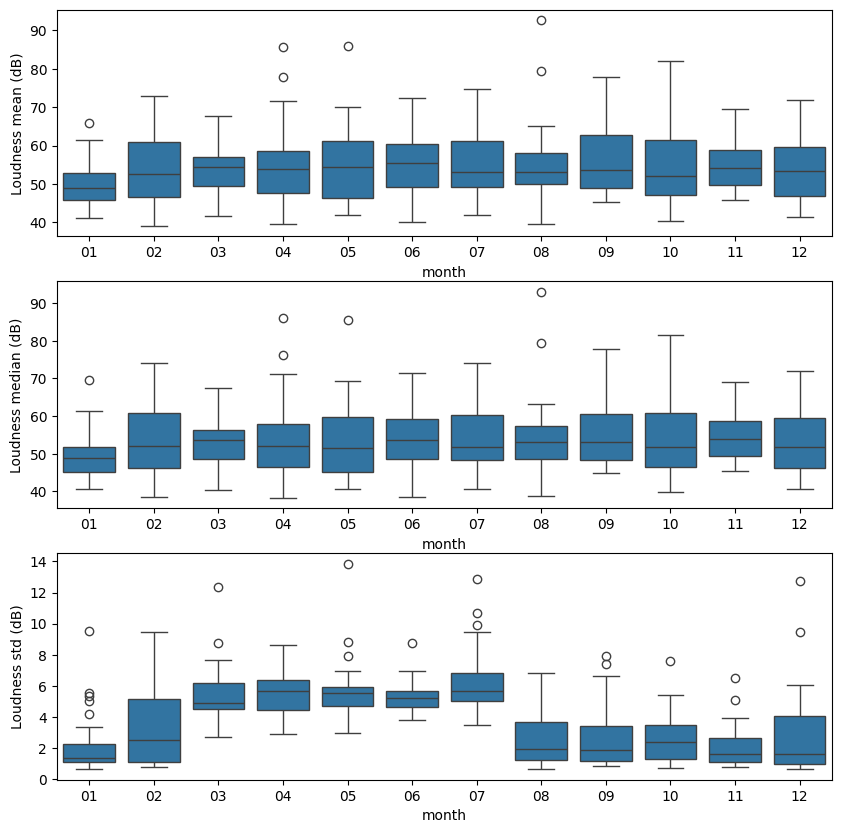

In [43]:
f, ax = plt.subplots(2, 1, figsize=(10, 5))
sns.boxplot(data=stats, x="month", y="mean", ax=ax[0])
ax[0].set(title="Loudness mean (dB)")
# sns.boxplot(data=stats, x="month", y="50%", ax=ax[1])
# ax[1].set(ylabel="Loudness median (dB)")
sns.boxplot(data=stats, x="month", y="std", ax=ax[2])
ax[1].set(title="Loudness std (dB)")

In [ ]:
# p value for loudness and HR?